In [41]:
from skimage import io
from skimage.color import rgb2gray
from skimage.filters.rank import entropy
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt 
from skimage.morphology import disk
import numpy as np
import glob
from scipy.stats import linregress

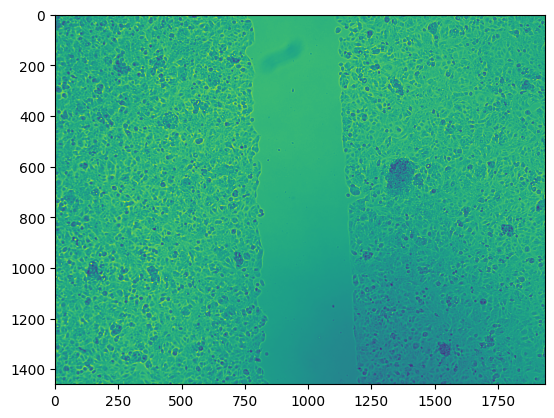

In [32]:
img= io.imread("wound_healing_img/scratch1.jpg")
img=rgb2gray(img)
plt.imshow(img)


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3550: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


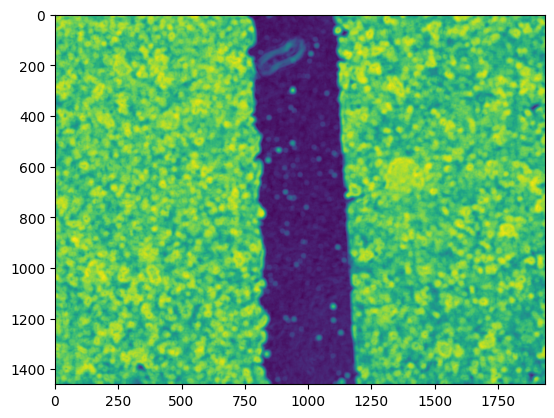

In [33]:
entropy_img= entropy(img,disk(10))
plt.imshow(entropy_img)

494402


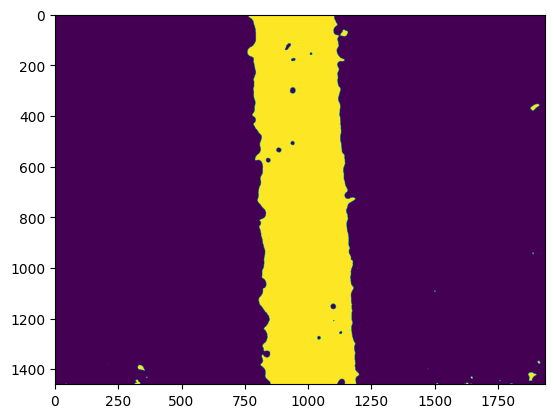

In [34]:
thres= threshold_otsu(entropy_img)
thres_img= entropy_img<=thres
plt.imshow(thres_img)
print(np.sum(thres_img==1))

In [39]:
time=0
time_list=[]
area_list=[]
path= "wound_healing_img/*.*"

for file in glob.glob(path):
    img= io.imread(file)
    img=rgb2gray(img)
    entropy_img= entropy(img,disk(10))
    thres= threshold_otsu(entropy_img)
    thres_img= entropy_img<=thres
    print(time,np.sum(thres_img==1))
    time_list.append(time)
    area_list.append(np.sum(thres_img==1))
    time+=1



C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3550: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


0 494402
1 376545
2 151325


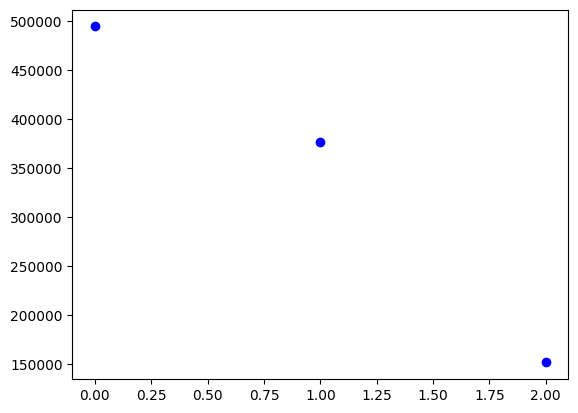

In [40]:
plt.plot(time_list,area_list,'bo')

In [45]:
slope,intercept,r_value,p_value,std_err=linregress(time_list,area_list)
print("y= ", slope, "x"," + ", intercept)
print("R\N{SUPERSCRIPT TWO} = " ,r_value**2)

y=  -171538.5 x  +  512295.8333333333
R² =  0.9683878420911695
